# Generate a umap of the fingerprints

In [1]:
import pandas as pd
import numpy as np

#%matplotlib inline

df = pd.read_csv('df_notebook1_Transformation.csv',
                 usecols=['fingerprint', 'expt', 'calc'])

In [2]:
df.head()

,expt,calc,fingerprint
0,-4.50,-3.156,0000000000000000000000000000000000000000000000...
1,-0.86,-0.795,0000000000000000000000100000000000000000000000...
2,-4.70,-3.889,0000000000000000000000000000000000000000000000...
3,-8.26,-7.844,1000010000010000000000000010000000000000000000...
4,-3.13,-3.830,0000000000000000000000000000000000000000000000...


In [3]:
#type(df.iloc[2,2])

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [6]:
import umap    # run twice, ignore warning after 1st run

## Umap dimension reduction

https://pypi.org/project/umap-learn/

https://umap-learn.readthedocs.io/en/latest/basic_usage.html

I need more physiochemical properties of course..
I followed [this example](https://umap-learn.readthedocs.io/en/latest/parameters.html).

In [7]:
sns.set(style='white', context='poster', rc={'figure.figsize':(14,10)})
np.random.seed(42)

In [17]:
umap_input = np.zeros([20, 2048], dtype=np.int8)

In [29]:
for i in range(len(df)):                     # 0-19    (die 0 ist enthalten, die 20 nicht)
    umap_input[i] = np.asarray(list(df.iloc[0,2]),
                               dtype=np.int8)

In [36]:
#umap_input

In [31]:
fit = umap.UMAP()
%time u = fit.fit_transform(umap_input)

CPU times: user 6.6 s, sys: 38.8 ms, total: 6.63 s
Wall time: 6.15 s


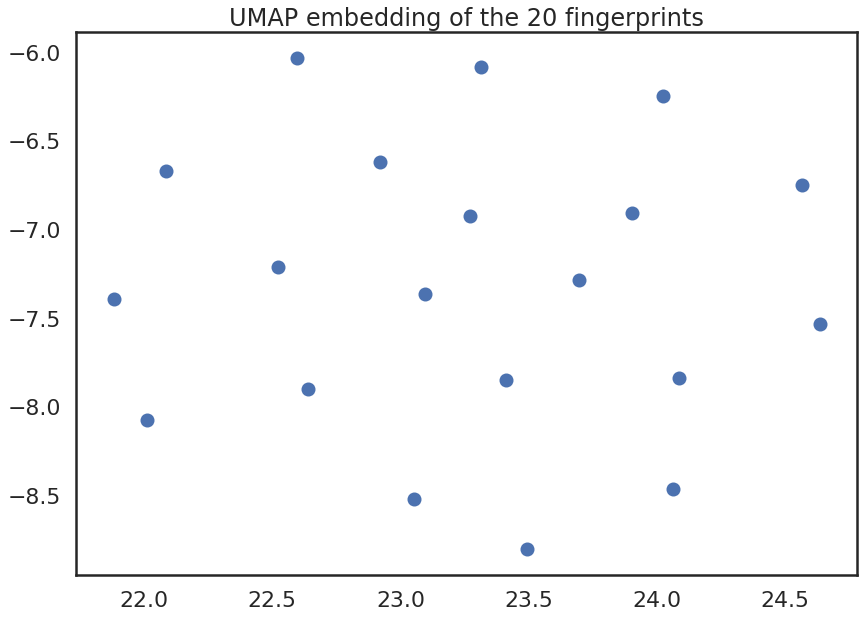

In [35]:
plt.scatter(u[:,0], u[:,1])
plt.title('UMAP embedding of the ' + str(len(df)) + ' fingerprints');

I could try to tweak n_neighbours, min_dist, n_components or metric.

To color by solvation, I follow a different [guide](https://umap-learn.readthedocs.io/en/latest/plotting.html).

In [38]:
# Alternative:
#import umap.plot
#umap.plot.points(fit)

### Plotting: Colour by parameter

### Save the umap plot